In [11]:
path = "/home/ziran/se3/EFEM/data/ShapeNetV1_SDF/03797390/1a1c0a8d4bad82169f0594e65f756cf5/pointcloud.npz"
import numpy as np

# 加载 .npz 文件
data = np.load(path)
# 查看文件中的内容
print("Keys in the NPZ file:", data.files)

# 检查每个键的数据类型和形状
for key in data.files:
    print(f"Key: {key}")
    print("Data type:", type(data[key]))
    print("Shape:", data[key].shape)
    print("---")


Keys in the NPZ file: ['points', 'normals', 'scale', 'loc']
Key: points
Data type: <class 'numpy.ndarray'>
Shape: (100106, 3)
---
Key: normals
Data type: <class 'numpy.ndarray'>
Shape: (100106, 3)
---
Key: scale
Data type: <class 'numpy.ndarray'>
Shape: ()
---
Key: loc
Data type: <class 'numpy.ndarray'>
Shape: (3,)
---


In [16]:
import open3d as o3d
import numpy as np

points = data['points']

# 随机选取点云的一个子集
# 例如，选取总点数的 10%
sample_size = int(len(points) * 0.01)
indices = np.random.choice(len(points), sample_size, replace=False)
points = points[indices]


# 将 NumPy 数组转换为 Open3D 的点云格式
point_cloud_o3d = o3d.geometry.PointCloud()
point_cloud_o3d.points = o3d.utility.Vector3dVector(points)

# 计算法线
point_cloud_o3d.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

# 获取法线（作为 NumPy 数组）
normals_np = np.asarray(point_cloud_o3d.normals)

# 显示前几个法线
print(normals_np.shape)


(1001, 3)


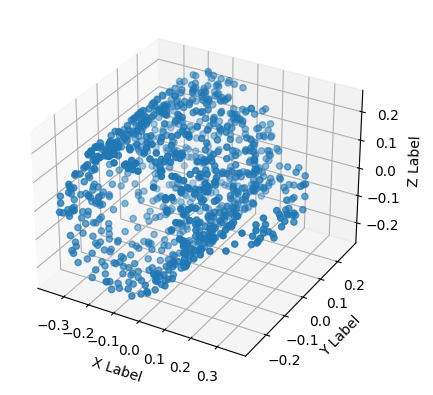

len(points) 1001


In [17]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制点云
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# 绘制法线
# for i in range(len(points)):
#     ax.quiver(
#         points[i, 0], points[i, 1], points[i, 2],
#         normals_np[i, 0], normals_np[i, 1], normals_np[i, 2],
#         length=0.1, color='red'
#     )

# 设置图形属性
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
print("len(points)",len(points))    

In [18]:
def create_sdf_file(points, normals, eps, file_name, only_surface=False):
    # 根据每个点和其法线计算新的点位置
    points_outward = points + eps * normals  # 沿着法线方向
    points_inward = points - eps * normals   # 沿着法线反方向

    # 创建包含所有点和对应SDF值的数组
    sdf_values_outward = np.full((len(points), 1), eps)
    sdf_values_inward = np.full((len(points), 1), -eps)
    
    # 合并原始点、外部点和内部点
    all_points = np.vstack((points, points_outward, points_inward))
    all_sdf_values = np.vstack((np.zeros((len(points), 1)), sdf_values_outward, sdf_values_inward))

    if only_surface:
        concated_sdf = np.hstack((points, np.zeros((len(points), 1))))
    else:
        concated_sdf = np.hstack((all_points, all_sdf_values))
    result = {
        "sdf": concated_sdf,
        "normals": normals,
        "eps": eps,
    }
    # 保存到文件
    # np.savetxt(file_name, np.hstack((all_points, all_sdf_values)), fmt='%f', header='X Y Z SDF')

    import pickle

    # 保存到文件
    with open(file_name, 'wb') as f:
        pickle.dump(result, f)

In [19]:
create_sdf_file(points, normals_np, 0.005, 'test.sdf', only_surface=True)

## 读取sdf

In [5]:
# 读取文件
data = np.loadtxt('test.sdf')

# 分离点云位置和SDF值
points = data[:, :3]  # 取前三列为点云位置
sdf_values = data[:, 3]  # 取第四列为SDF值

# 检查结果
print("Points shape:", points.shape)
print("SDF Values shape:", sdf_values.shape)

Points shape: (30030, 3)
SDF Values shape: (30030,)


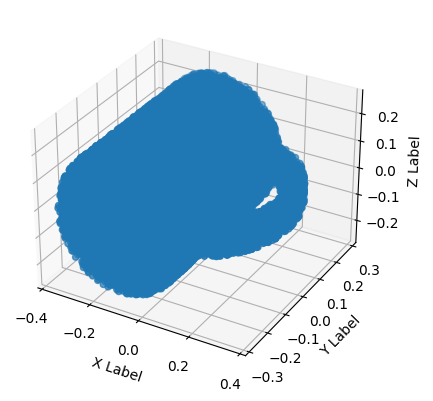

In [6]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制点云
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# 绘制法线
# for i in range(len(points)):
#     ax.quiver(
#         points[i, 0], points[i, 1], points[i, 2],
#         normals_np[i, 0], normals_np[i, 1], normals_np[i, 2],
#         length=0.1, color='red'
#     )

# 设置图形属性
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()